# COVID-19 Visualization for Southeast Asian Countries
Using dataset from this <a href="https://github.com/datasets/covid-19/blob/main/data/countries-aggregated.csv" >COVID-19 Github repository</a>,
Since I live in Indonesia, I am interested in visualizing the spread of the virus Southeast Asian countries. I will be exploring the data to see the spread of the virus in six countries with most cases:<br>
<ul>
<li>Burma (Myanmar)</li>
<li>Indonesia</li>
<li>Malaysia</li>
<li>Philippines</li>
<li>Singapore</li>
<li>Thailand</li>
</ul>
I am using source code from <a href ="https://datagy.io/">Nik Piepenbreier</a> as seen in this <a href="https://towardsdatascience.com/visualizing-covid-19-data-beautifully-in-python-in-5-minutes-or-less-affc361b2c6a">article</a> he wrote on Medium.<br>

###### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

###### Loading and selecting data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Burma', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']
df = df[df['Country'].isin(countries)]

###### Creating summary column

In [3]:
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
print(df)

            Date   Country  Confirmed  Recovered  Deaths  Cases
10260 2020-01-22     Burma          0          0       0      0
10261 2020-01-23     Burma          0          0       0      0
10262 2020-01-24     Burma          0          0       0      0
10263 2020-01-25     Burma          0          0       0      0
10264 2020-01-26     Burma          0          0       0      0
...          ...       ...        ...        ...     ...    ...
65735 2021-01-31  Thailand      19618      12514      77  32209
65736 2021-02-01  Thailand      20454      13217      79  33750
65737 2021-02-02  Thailand      21249      14001      79  35329
65738 2021-02-03  Thailand      21249      14001      79  35329
65739 2021-02-04  Thailand      22058      14798      79  36935

[2280 rows x 6 columns]


###### Restructuring data

In [4]:
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
print(df)

Country      Burma  Indonesia  Malaysia  Philippines  Singapore  Thailand
Date                                                                     
2020-01-22       0          0         0            0          0         6
2020-01-23       0          0         0            0          1         6
2020-01-24       0          0         0            0          3         8
2020-01-25       0          0         3            0          3         9
2020-01-26       0          0         4            0          4        14
...            ...        ...       ...          ...        ...       ...
2021-01-31  268348    1981533    381768      1023918     118793     32209
2021-02-01  268816    2003267    390272      1025653     118865     33750
2021-02-02  268816    2026798    397409      1027338     118914     35329
2021-02-03  270471    2048106    405515      1028781     118951     35329
2021-02-04  271136    2071412    414195      1030623     119001     36935

[380 rows x 6 columns]


###### Calculating Rates per 100,000

In [5]:
populations = {'Burma': 54626477, 'Indonesia': 276361783, 'Malaysia': 32615244, 'Philippines': 111046913, 'Singapore': 5896686, 'Thailand': 69950850}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
print(percapita)

                 Burma   Indonesia     Malaysia  Philippines    Singapore  \
Date                                                                        
2020-01-22    0.000000    0.000000     0.000000     0.000000     0.000000   
2020-01-23    0.000000    0.000000     0.000000     0.000000     0.016959   
2020-01-24    0.000000    0.000000     0.000000     0.000000     0.050876   
2020-01-25    0.000000    0.000000     0.009198     0.000000     0.050876   
2020-01-26    0.000000    0.000000     0.012264     0.000000     0.067835   
...                ...         ...          ...          ...          ...   
2021-01-31  491.241637  717.006881  1170.520141   922.058950  2014.572253   
2021-02-01  492.098365  724.871210  1196.593838   923.621353  2015.793278   
2021-02-02  492.098365  733.385774  1218.476244   925.138729  2016.624253   
2021-02-03  495.128031  741.095957  1243.329653   926.438180  2017.251724   
2021-02-04  496.345389  749.529105  1269.942975   928.096939  2018.099658   

###### Creating visualization

Text(2020-01-23 00:00:00, -350000, 'Dhanny W.I.                      Source: Github Covid Dataset')

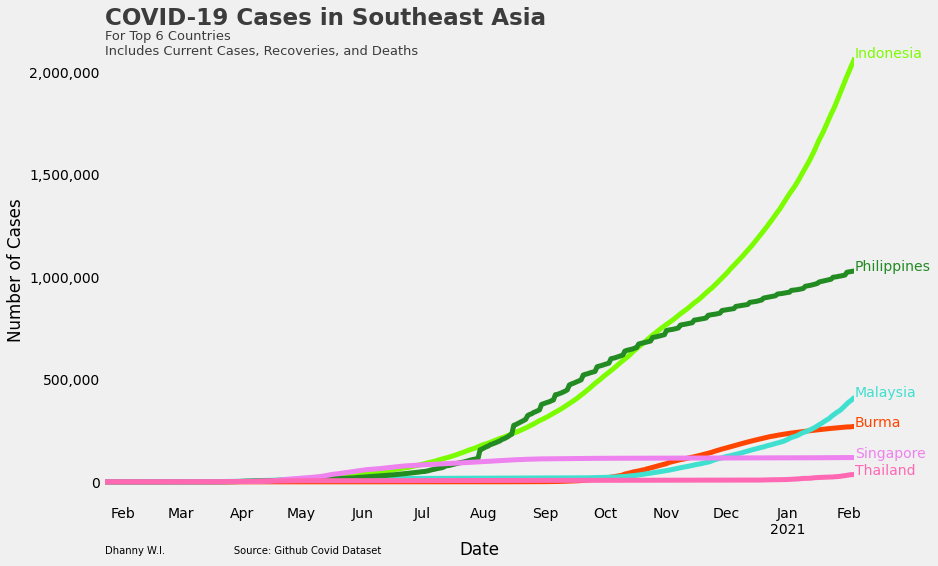

In [6]:
# Generating Colours and Style
colors = {'Burma':'orangered', 'Indonesia':'lawngreen', 'Malaysia':'turquoise', 'Philippines':'forestgreen', 'Singapore':'violet', 'Thailand':'hotpink'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Cases')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country)

# Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+160000, s = "COVID-19 Cases in Southeast Asia", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For Top 6 Countries\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 13, alpha = .75)
plot.text(x = percapita.index[1], y = -350000,s = 'Dhanny W.I.                      Source: Github Covid Dataset', fontsize = 10)

Text(2020-01-23 00:00:00, -335, 'Dhanny W.I.                      Source: Github Covid Dataset')

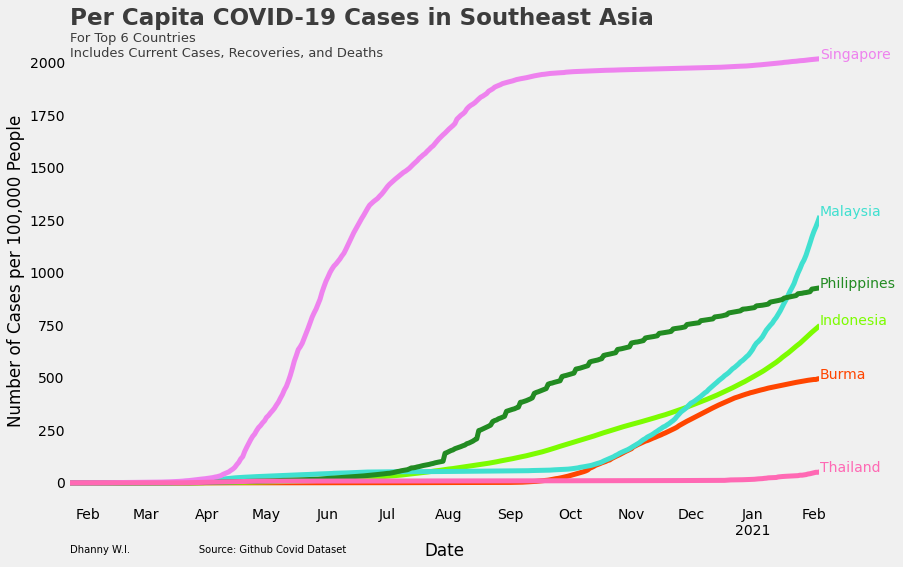

In [7]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('Number of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+160, s = "Per Capita COVID-19 Cases in Southeast Asia", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For Top 6 Countries\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 13, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -335,s = 'Dhanny W.I.                      Source: Github Covid Dataset', fontsize = 10)
